# Análsis Exploraotio de precios de compras y ventas Supermercado La Osa - Madrid

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Importamos los datasets

In [3]:
#pip install xlrd


# Datos de compras de productos

In [4]:
#Datasets de compra de productos a proveedores 2021-2022
precio_enejun= pd.read_excel("Evolución_precio_enerojunio22.xls")
precio_juldic= pd.read_excel("Evolución_precio_juliodiciembre22.xls")
precio_2021= pd.read_excel("Price_history_2021.xls")
precio_2022= pd.read_excel("Price_history_122022.xls")

# Datos de ventas de productos

In [5]:
#Datasets de venta de productis al publico 2021-2022
ventas_2021= pd.read_excel("inflacion_osa_2021.xls")
ventas_2022= pd.read_excel("inflacion_osa_2022.xls")
ejemplo_ventas= pd.read_excel("ejemplo_tabla_ventas.xls")

### Exploramos los datasets de precio
* `Price_history_122022.xls` -->Hay información de Diciembre del 2022, la cual aparentemente ya está en el archivo `Evolución_precio_juliodiciembre22.xls`
* Tenemos que corroborar si esta es informacion adicional del mes de Diciembre del 2022 o es información duplicada (Preguntar al Stakeholder)
* El supermercado comenzó en el año 2020 --> Preguntar si hay información de Dicembre 2020
* ¿Puede haber erro en los nombres de los archivos?

### Precios de Compra de Productos a Proveedores
* Se revisan los archivos:

`Evolución_precio_enerojunio22.xls` 

`Evolución_precio_juliodiciembre22.xls`

`Price_history_2021.xls`

`Price_history_122022.xls`




In [6]:
precio_enejun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33361 entries, 0 to 33360
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   External ID                                             21005 non-null  object        
 1   Producto/Nombre                                         21005 non-null  object        
 2   Coste                                                   21005 non-null  float64       
 3   Fecha                                                   21005 non-null  datetime64[ns]
 4   Producto/Cuenta analítica para gastos/Nombre a mostrar  21005 non-null  object        
 5   Producto/Referencia interna                             21005 non-null  float64       
 6   Producto/Proveedores/Nombre a mostrar                   33361 non-null  object        
 7   Producto/Categoría de producto/Nombre a mostrar         210

In [7]:
precio_juldic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   External ID                                             16217 non-null  object        
 1   Producto/Nombre                                         16217 non-null  object        
 2   Coste                                                   16217 non-null  float64       
 3   Fecha                                                   16217 non-null  datetime64[ns]
 4   Producto/Cuenta analítica para gastos/Nombre a mostrar  16217 non-null  object        
 5   Producto/Referencia interna                             16217 non-null  float64       
 6   Producto/Proveedores/Nombre a mostrar                   24783 non-null  object        
 7   Producto/Categoría de producto/Nombre a mostrar         162

In [8]:
precio_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57558 entries, 0 to 57557
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   External ID                                             37023 non-null  object        
 1   Producto/Nombre                                         37023 non-null  object        
 2   Coste                                                   37023 non-null  float64       
 3   Fecha                                                   37023 non-null  datetime64[ns]
 4   Producto/Cuenta analítica para gastos/Nombre a mostrar  37023 non-null  object        
 5   Producto/Referencia interna                             37023 non-null  float64       
 6   Producto/Proveedores/Nombre a mostrar                   57558 non-null  object        
 7   Producto/Categoría de producto/Nombre a mostrar         370

In [9]:
precio_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   External ID                                             2809 non-null   object        
 1   Producto/Nombre                                         2809 non-null   object        
 2   Coste                                                   2809 non-null   float64       
 3   Fecha                                                   2809 non-null   datetime64[ns]
 4   Producto/Cuenta analítica para gastos/Nombre a mostrar  2809 non-null   object        
 5   Producto/Referencia interna                             2809 non-null   float64       
 6   Producto/Proveedores/Nombre a mostrar                   4254 non-null   object        
 7   Producto/Categoría de producto/Nombre a mostrar         2809 

> #### Los 4 archivos de precios de compra tienen las mismas 8 columnas.
> #### Se concatenarán los 4 archivos en un solo dataframe `precios_compra_2022` para su manipulación.

> #### Las columnas o variables:

* External ID
* Producto/Nombre
* Coste
* Fecha
* Producto/Cuenta analítica para gastos/Nombre a mostrar
* Producto/Referencia interna
* Producto/Proveedores/Nombre a mostrar
* Producto/Categoría de producto/Nombre a mostrar


In [10]:
precios_compra_2022 = pd.concat([precio_enejun, precio_juldic,precio_2021,precio_2021])
precios_compra_2022.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 173260 entries, 0 to 57557
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count   Dtype         
---  ------                                                  --------------   -----         
 0   External ID                                             111268 non-null  object        
 1   Producto/Nombre                                         111268 non-null  object        
 2   Coste                                                   111268 non-null  float64       
 3   Fecha                                                   111268 non-null  datetime64[ns]
 4   Producto/Cuenta analítica para gastos/Nombre a mostrar  111268 non-null  object        
 5   Producto/Referencia interna                             111268 non-null  float64       
 6   Producto/Proveedores/Nombre a mostrar                   173260 non-null  object        
 7   Producto/Categoría de producto/Nombre a mostrar  

In [11]:
precios_compra_2022.columns

Index(['External ID', 'Producto/Nombre', 'Coste', 'Fecha',
       'Producto/Cuenta analítica para gastos/Nombre a mostrar',
       'Producto/Referencia interna', 'Producto/Proveedores/Nombre a mostrar',
       'Producto/Categoría de producto/Nombre a mostrar'],
      dtype='object')

### Renombramos las columnas para que sea más fácil su manipulación

In [12]:
precios_compra_2022.rename(columns={'External ID':'External_ID',
                              'Producto/Nombre':'Producto_nombre', 
                              'Coste':'Coste',
                             'Fecha':'Fecha', 
                              'Producto/Cuenta analítica para gastos/Nombre a mostrar':'Producto_nombre_publico',
                             'Producto/Referencia interna':'Producto_Referencia_interna', 
                              'Producto/Proveedores/Nombre a mostrar':'Producto_Proveedores_publico',
                              'Producto/Categoría de producto/Nombre a mostrar':'Producto_Categoría_publico'
                             }, inplace=True)

### Ordenamos los valores por fecha

In [13]:
precios_compra_2022 = precios_compra_2022.sort_values(by='Fecha')
precios_compra_2022

,External_ID,Producto_nombre,Coste,Fecha,Producto_nombre_publico,Producto_Referencia_interna,Producto_Proveedores_publico,Producto_Categoría_publico
57557,__export__.product_price_history_17315_175465d1,Gofio maíz bio La Piña 500 gr,1.81,2021-01-01 12:18:55,Eco,6129.0,(BIOGRAN) BIOGRAN S.L.,"Seco Envasado / Panes, harinas / Harinas"
57557,__export__.product_price_history_17315_175465d1,Gofio maíz bio La Piña 500 gr,1.81,2021-01-01 12:18:55,Eco,6129.0,(BIOGRAN) BIOGRAN S.L.,"Seco Envasado / Panes, harinas / Harinas"
57556,__export__.product_price_history_17316_a7765be4,Copos amaranto bio El Granero Integral 250 gr,2.21,2021-01-01 12:22:37,Eco,3732.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Cereales y semillas / Cereales
57556,__export__.product_price_history_17316_a7765be4,Copos amaranto bio El Granero Integral 250 gr,2.21,2021-01-01 12:22:37,Eco,3732.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Cereales y semillas / Cereales
57555,__export__.product_price_history_17317_607ad568,Copos 5 cereales bio El Granero Integral 500 gr,1.37,2021-01-01 12:23:33,Eco,3733.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Desayunos y merienda / Cereales
...,...,...,...,...,...,...,...,...
57539,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) SEBASTIAN GONZALEZ LOPEZ,NaN
57541,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) EL ARBOL DEL PAN S.L.,NaN
57543,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) SEBASTIAN GONZALEZ LOPEZ,NaN
57545,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) EL ARBOL DEL PAN S.L.,NaN


In [14]:
precios_compra_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173260 entries, 57557 to 57547
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   External_ID                   111268 non-null  object        
 1   Producto_nombre               111268 non-null  object        
 2   Coste                         111268 non-null  float64       
 3   Fecha                         111268 non-null  datetime64[ns]
 4   Producto_nombre_publico       111268 non-null  object        
 5   Producto_Referencia_interna   111268 non-null  float64       
 6   Producto_Proveedores_publico  173260 non-null  object        
 7   Producto_Categoría_publico    111268 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 11.9+ MB


### Revisamos que si hay valores duplicados en los dataset de compra de productos para el mes de Diciembre de 2022.

In [15]:
precios_compra_2022[precios_compra_2022['Producto_nombre']=='Yogur desnatado vainilla Casa grande xanceda 2 x 125 g']

,External_ID,Producto_nombre,Coste,Fecha,Producto_nombre_publico,Producto_Referencia_interna,Producto_Proveedores_publico,Producto_Categoría_publico
52632,__export__.product_price_history_20750_5ef29dee,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2021-02-04 14:38:32,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
52632,__export__.product_price_history_20750_5ef29dee,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2021-02-04 14:38:32,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
50411,__export__.product_price_history_23664_d513e609,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2021-02-17 10:48:40,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
50411,__export__.product_price_history_23664_d513e609,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2021-02-17 10:48:40,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
48590,__export__.product_price_history_24956_2f82915f,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2021-03-02 12:11:16,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
...,...,...,...,...,...,...,...,...
11712,__export__.product_price_history_87371_bf9be6b3,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2022-10-04 11:01:07,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
9416,__export__.product_price_history_89042_40e3206f,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2022-10-18 11:07:36,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
7856,__export__.product_price_history_90044_5da42c4b,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2022-10-27 08:49:33,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."
4249,__export__.product_price_history_92400_f9738168,Yogur desnatado vainilla Casa grande xanceda 2...,1.45,2022-11-17 11:41:15,Eco,1559.0,(CASA GRANDE XANCEDA) CASA GRANDE DE XANCEDA S.L.,"Resto Producto Fresco / Leche, zumos, producto..."


In [16]:
precios_compra_2022.describe()

,Coste,Producto_Referencia_interna
count,111268.000000,111268.000000
mean,2.963484,2678.294640
std,3.425243,1691.079528
min,0.000000,5.000000
25%,1.350000,1113.000000
50%,2.010000,2668.000000
75%,3.100000,4087.000000
max,156.000000,6499.000000


In [17]:
precios_compra_2022.dtypes

External_ID                             object
Producto_nombre                         object
Coste                                  float64
Fecha                           datetime64[ns]
Producto_nombre_publico                 object
Producto_Referencia_interna            float64
Producto_Proveedores_publico            object
Producto_Categoría_publico              object
dtype: object

In [18]:
precios_compra_2022.head(5)

,External_ID,Producto_nombre,Coste,Fecha,Producto_nombre_publico,Producto_Referencia_interna,Producto_Proveedores_publico,Producto_Categoría_publico
57557,__export__.product_price_history_17315_175465d1,Gofio maíz bio La Piña 500 gr,1.81,2021-01-01 12:18:55,Eco,6129.0,(BIOGRAN) BIOGRAN S.L.,"Seco Envasado / Panes, harinas / Harinas"
57557,__export__.product_price_history_17315_175465d1,Gofio maíz bio La Piña 500 gr,1.81,2021-01-01 12:18:55,Eco,6129.0,(BIOGRAN) BIOGRAN S.L.,"Seco Envasado / Panes, harinas / Harinas"
57556,__export__.product_price_history_17316_a7765be4,Copos amaranto bio El Granero Integral 250 gr,2.21,2021-01-01 12:22:37,Eco,3732.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Cereales y semillas / Cereales
57556,__export__.product_price_history_17316_a7765be4,Copos amaranto bio El Granero Integral 250 gr,2.21,2021-01-01 12:22:37,Eco,3732.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Cereales y semillas / Cereales
57555,__export__.product_price_history_17317_607ad568,Copos 5 cereales bio El Granero Integral 500 gr,1.37,2021-01-01 12:23:33,Eco,3733.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Desayunos y merienda / Cereales


In [19]:
precios_compra_2022.columns

Index(['External_ID', 'Producto_nombre', 'Coste', 'Fecha',
       'Producto_nombre_publico', 'Producto_Referencia_interna',
       'Producto_Proveedores_publico', 'Producto_Categoría_publico'],
      dtype='object')

### visualizacion de los datos

Text(0.5, 1.0, 'Coste del producto a lo largo del tiempo')

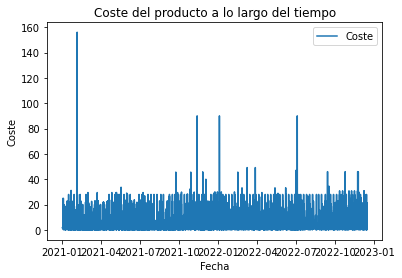

In [25]:
# Utilizando matplotlib

plt.plot(precios_compra_2022['Fecha'], precios_compra_2022['Coste'], label='Coste')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')

In [26]:
# Utilizando seaborn
'''sns.lineplot(x='Fecha', y='Coste', data=precios_compra_2022, hue='Producto_nombre')
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')'''

"sns.lineplot(x='Fecha', y='Coste', data=precios_compra_2022, hue='Producto_nombre')\nplt.xlabel('Fecha')\nplt.ylabel('Coste')\nplt.title('Coste del producto a lo largo del tiempo')"

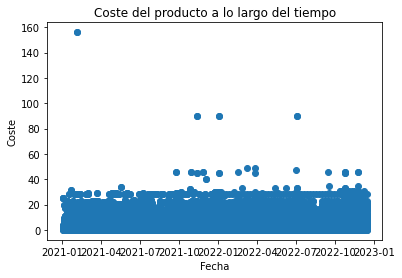

In [27]:
plt.scatter(precios_compra_2022['Fecha'], precios_compra_2022['Coste'])
plt.xlabel('Fecha')
plt.ylabel('Coste')
plt.title('Coste del producto a lo largo del tiempo')
plt.show()

In [24]:
precios_compra_2022

,External_ID,Producto_nombre,Coste,Fecha,Producto_nombre_publico,Producto_Referencia_interna,Producto_Proveedores_publico,Producto_Categoría_publico
57557,__export__.product_price_history_17315_175465d1,Gofio maíz bio La Piña 500 gr,1.81,2021-01-01 12:18:55,Eco,6129.0,(BIOGRAN) BIOGRAN S.L.,"Seco Envasado / Panes, harinas / Harinas"
57557,__export__.product_price_history_17315_175465d1,Gofio maíz bio La Piña 500 gr,1.81,2021-01-01 12:18:55,Eco,6129.0,(BIOGRAN) BIOGRAN S.L.,"Seco Envasado / Panes, harinas / Harinas"
57556,__export__.product_price_history_17316_a7765be4,Copos amaranto bio El Granero Integral 250 gr,2.21,2021-01-01 12:22:37,Eco,3732.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Cereales y semillas / Cereales
57556,__export__.product_price_history_17316_a7765be4,Copos amaranto bio El Granero Integral 250 gr,2.21,2021-01-01 12:22:37,Eco,3732.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Cereales y semillas / Cereales
57555,__export__.product_price_history_17317_607ad568,Copos 5 cereales bio El Granero Integral 500 gr,1.37,2021-01-01 12:23:33,Eco,3733.0,(BIOGRAN) BIOGRAN S.L.,Seco Envasado / Desayunos y merienda / Cereales
...,...,...,...,...,...,...,...,...
57539,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) SEBASTIAN GONZALEZ LOPEZ,NaN
57541,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) EL ARBOL DEL PAN S.L.,NaN
57543,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) SEBASTIAN GONZALEZ LOPEZ,NaN
57545,NaN,NaN,NaN,NaT,NaN,NaN,(EL ARBOL DEL PAN) EL ARBOL DEL PAN S.L.,NaN


In [ ]:
ventas_2021.info()

In [ ]:
ventas_2021.head()

## ASPECTOS ESENCIALES
### 1. Analisis exploratorio de los datos
### 2. Visualizacion de los datos en una herramienta interactiva de facil utilizacion



## ASPECTOS OPCIONALES
### 1. Predecir los valores de venta y /o de inflacion para los siguiente meses (o año)
### 2. Analisis de series temporales 

## Ventas de Productos 2021 - 2022

In [ ]:
#Datasets de venta de productis al publico 2021-2022
ventas_2021= pd.read_excel("inflacion_osa_2021.xls")
ventas_2022= pd.read_excel("inflacion_osa_2022.xls")

In [ ]:
ventas_2021.info()

In [ ]:
ventas_2021.head(10)

In [ ]:
ventas_2022.info()

In [ ]:
ventas_2021.head(10)

### Se concatenan los dos datasets de productos vendidos en el 2021 y 2022

In [ ]:
precios_ventas = pd.concat([ventas_2021, ventas_2022])
precios_ventas.info()

In [ ]:
precios_ventas.isnull().sum()

## Asunciones de la primer reunión con el stakeholder
* #### ¿A que precio compra la OSA sus productos?
* #### ¿Hay algun producto, categoria o proveedor que los precios sean mas altos?
* #### ¿Cual es la implicacion en la canasta del comprador, la subida de precios de los productos que compra la Osa?
* #### Analizar los productos que mas se consumen en la cesta familiar y su precio (de compra y venta?)
* #### Variacion de los precios de cada producto y cada categoría
* #### ¿Cómo afecta esta variación de los productos en la compra de los usuarios?
* #### Agrupar las comnpras por tipos de productos, categorías, tipo de comprador

## Se rellenan todos los nulos de las ventas con ceros --> de acuerdo a la reunion con el stakeholder

nota: quitar corchetes y ceros de referencia interna para que queden igual a los de arriba

In [ ]:
ventas= precios_ventas.fillna(0)
ventas

### Seria bueno poder tener todos los nombres de los meses en una columna, las unidades vendidas de cada cada producto por mes en otra columna  y el precio medio para esas ventas mensuales.

### Este es un ejemplo con dos productos.

### ¿Cómo poder hacerlo con Pandas?

In [ ]:
#Datasets de venta de productis al publico 2021-2022
ejemplo_ventas_2021= pd.read_excel("ejemplo_tabla_ventas.xls")
ejemplo_ventas_2021

In [ ]:
df = pd.ejemplo_ventas_2021({
    "x": range(100),
    "y": np.random.randn(100).cumsum()
})

sns.relplot(x = "Mes", y = "Price_mes", data = df, kind = "line");

In [ ]:
precios_ventas.columns.tolist()

In [ ]:
columnas = precios_ventas.columns.values[2:25]

In [ ]:
df = pd.pivot_table(precios_ventas, columns=['Producto_Referencia_interna','Producto_nombre'] , values=columnas).reset_index()

In [ ]:
df

### Intentamos modificar la estructura del dataframe ventas para facilitar la visualizacion de precios -->Funcion `pivot_table()`

In [ ]:
#Se crean 3 columnas vacias para jugar un poco con pivot_table()
precios_ventas['Fecha_venta']=""
precios_ventas['price_mean_month']=""
precios_ventas['total_units_month']=""

In [ ]:
#Chequeamos las nuevas columnas creadas
precios_ventas.info()

#### Ahora extraemos los valores de las columnas de interes para trasnponer y los valores

In [ ]:
# se crea el objeto columnas con los valores de las columnas 26 a 31
columnas =precios_ventas.columns.values[26:28]

In [ ]:
# se crea el objeto valores con los valores de las columnas 2 a 25
valores = precios_ventas.columns.values[2:25]

In [ ]:
# Chequeamos el nombre de las columnas
precios_ventas.columns

In [ ]:
#Funcion pivot_table()

In [ ]:
ventas= pd.pivot_table(precios_ventas, index=['Producto_Referencia_interna','Producto_nombre', 'Año','Fecha_venta', 'price_mean_month', 'total_units_month'],
                       columns=['Unidades_vendidas','Precio_medio'], values=valores,  aggfunc=np.sum)
ventas

In [ ]:
ventas= pd.pivot_table(precios_ventas, index=['Producto_Referencia_interna','Producto_nombre'] , columns=['Unidades_vendidas', 'Precio_medio', 'Año'], 
                       values=valores, aggfunc=np.sum)
ventas

In [ ]:
### Aun no logramos teenr la tabla bien 

### FORECASTING PRECIO/COMPRAS SUPERMERCADO LA OSA

In [ ]:
sns.histplot(np.log1p(precios_ventas ['Unidades_vendidas']), kde=True)

In [ ]:
ejemplo_ventas_2021.head(5)

In [ ]:
month= {'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':7, 'Agosto':8, 'Septiembre':9, 'Octubre':10, 'Noviembre':11, 'Diciembre':12}
ejemplo_ventas_2021['month'] = ejemplo_ventas_2021['Mes'].map(fecha.get)
ejemplo_ventas_2021['month'] = ejemplo_ventas_2021['month'].astype(int)
ejemplo_ventas_2021.head(5)


In [ ]:
ejemplo_ventas_2021['fecha'] = ejemplo_ventas_2021.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)
ejemplo_ventas_2021.head(5)


In [ ]:
ejemplo_ventas_2021['fecha'] = pd.PeriodIndex(ejemplo_ventas_2021['fecha'], freq='M')
ejemplo_ventas_2021.head(10)